# K Nearest Neighbours

Objective: Predict churn customer  
Dataset: ChurnData.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('ChurnData.csv')
print(data.shape)
data.head()

(200, 28)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data Exploration

0.0    142
1.0     58
Name: churn, dtype: int64


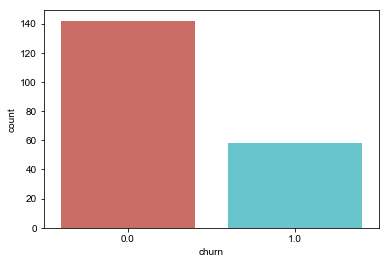

In [2]:
print(data['churn'].value_counts())

sns.countplot(x='churn',data = data, palette='hls',order = data['churn'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

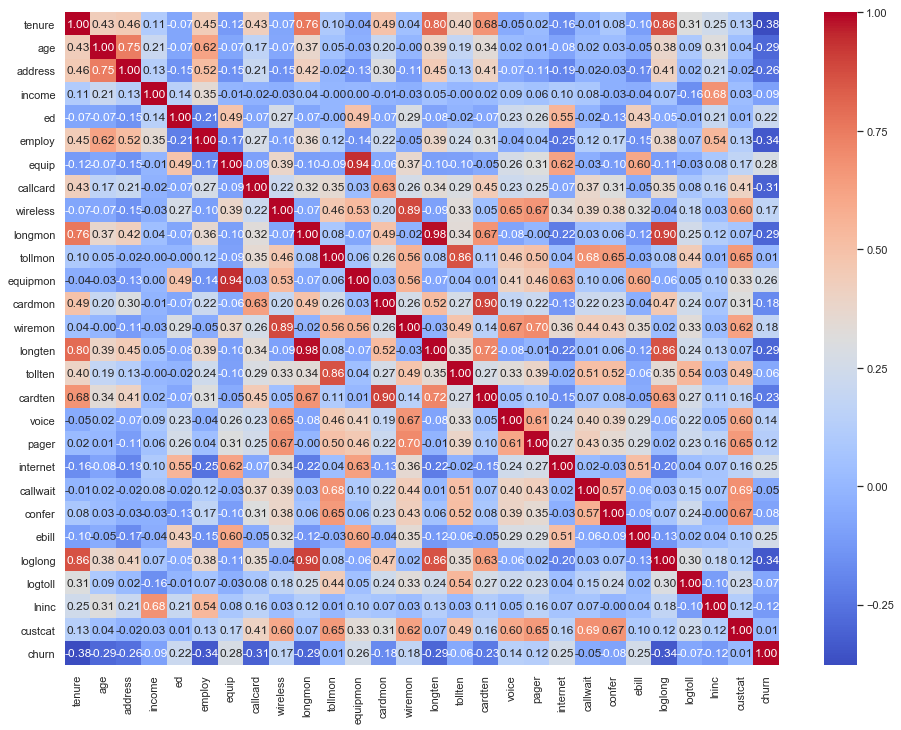

In [3]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [4]:
corr_rank = data.corr()
corr_rank["churn"].sort_values(ascending=False)

churn       1.000000
equip       0.275284
equipmon    0.255348
ebill       0.254838
internet    0.254838
ed          0.216112
wiremon     0.177483
wireless    0.174356
voice       0.142315
pager       0.124623
custcat     0.014839
tollmon     0.014356
callwait   -0.052885
tollten    -0.059482
logtoll    -0.070156
confer     -0.081361
income     -0.090790
lninc      -0.117459
cardmon    -0.177163
cardten    -0.228634
address    -0.260659
age        -0.287697
longmon    -0.292026
longten    -0.294906
callcard   -0.311451
loglong    -0.336869
employ     -0.337969
tenure     -0.376860
Name: churn, dtype: float64

## Data Processing and Selection

In [5]:
X=data.iloc[:, :-1] #from 1st variable until 2nd last var
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (200, 27)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0


In [6]:
y = data["churn"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (200,)


0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

## Data Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (200, 27)


array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673, -0.74922681,
         0.48126577, -0.80905935,  0.06044721,  1.08826163, -0.71940664,
        -0.36132818, -0.55974431,  1.54590766,  1.62368828, -0.88640526,
         1.0944415 ,  1.08347268, -0.88640526, -0.97509593, -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148, -0.23718629,
        -0.84846321, -0.80905935, -0.97385292, -0.56616669, -0.38801572,
        -0.61983235, -0.69284848, -0.64686916, -0.61588176, -0.88640526,
        -0.91370804, -0.92295821, -0.88640526,  0.07226665,  0.03858151,
        -0.60481397, -1.36987221]])

## Split Train Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (160, 27) (160,)
X TEST Set :  (40, 27) (40,)


## K Nearest Neighbour

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#using loop to find the best accuracy and the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neighf = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neighf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(np.round(mean_acc,4))

[0.725 0.85  0.85  0.875 0.8   0.825 0.85  0.825 0.825]


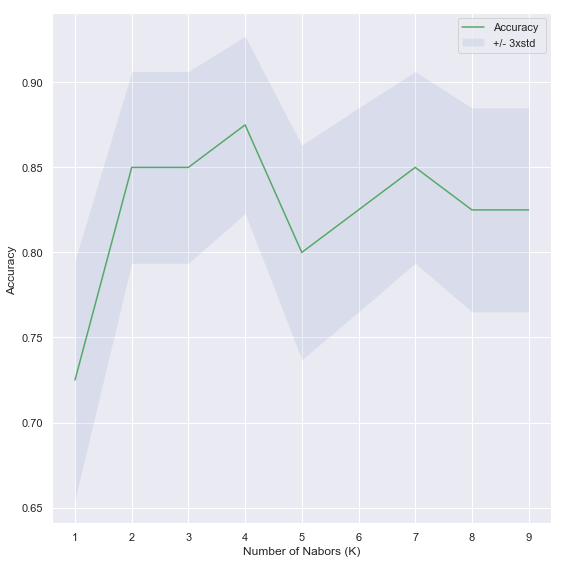

The best accuracy was 0.875 with k= 4


In [10]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1) 

In [11]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7875
Test set Accuracy :  0.875


## Test Prediction

In [14]:
df_pred1 = data[data.index == 1]
df_pred2 = data[data.index == 150]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
150,5.0,43.0,16.0,72.0,3.0,17.0,0.0,1.0,0.0,5.55,...,0.0,0.0,1.0,1.0,0.0,1.714,2.757,4.277,3.0,0.0


In [15]:
Xp = df_pred.iloc[:, :-1]
yp = df_pred["churn"]
Xp = scaler.transform(Xp)

pred = neigh.predict(Xp)
pred

array([0., 0.])